In [1]:
import pandas as pd 

In [2]:
dataset = pd.read_excel('Cancer du sein - datamart.xls', encoding='latin-1')

In [3]:
dataset

,clump,ucellsize,ucellshape,mgadhesion,sepics,bnuclei,bchromatin,normnucl,mitoses,classe
0,2,1,1,1,2,1,1,1,1,begnin
1,1,2,2,1,2,1,1,1,1,begnin
2,1,1,1,1,1,1,2,1,1,begnin
3,2,1,1,1,2,1,1,1,1,begnin
4,1,1,1,1,2,1,2,1,1,begnin
5,3,1,1,1,2,1,2,1,1,begnin
6,5,10,6,1,10,4,4,10,10,malignant
7,1,1,1,1,1,1,3,1,1,begnin
8,1,1,1,1,2,1,1,1,1,begnin
9,10,10,10,10,6,10,8,1,5,malignant


In [4]:
import numpy as np

In [5]:
data = dataset.iloc[:,0:-1]

In [6]:
data

,clump,ucellsize,ucellshape,mgadhesion,sepics,bnuclei,bchromatin,normnucl,mitoses
0,2,1,1,1,2,1,1,1,1
1,1,2,2,1,2,1,1,1,1
2,1,1,1,1,1,1,2,1,1
3,2,1,1,1,2,1,1,1,1
4,1,1,1,1,2,1,2,1,1
5,3,1,1,1,2,1,2,1,1
6,5,10,6,1,10,4,4,10,10
7,1,1,1,1,1,1,3,1,1
8,1,1,1,1,2,1,1,1,1
9,10,10,10,10,6,10,8,1,5


In [7]:
target = dataset.iloc[:,-1]

In [8]:
target

0         begnin
1         begnin
2         begnin
3         begnin
4         begnin
         ...    
394    malignant
395       begnin
396       begnin
397    malignant
398       begnin
Name: classe, Length: 399, dtype: object

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [11]:
x_train,x_test,y_train,y_test=train_test_split(data,target,random_state=0)

In [12]:
algorithm=DecisionTreeClassifier()
algorithm.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [13]:
y_pred=algorithm.predict(x_test)

In [14]:
cm=confusion_matrix(y_test, y_pred)

In [15]:
probs = algorithm.predict_proba(x_test)

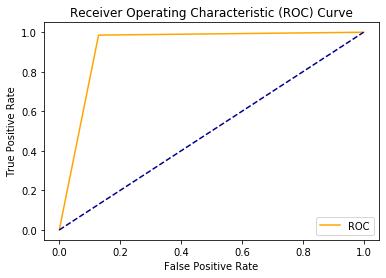

In [16]:
fpr, tpr, thresholds = roc_curve(y_test, probs[:,0],pos_label='begnin')
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [17]:
accuracy_score(y_test,y_pred)

0.95

In [18]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz


C:\Users\aymen\Anaconda2\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [19]:
!pip install pydotplus
import pydotplus

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


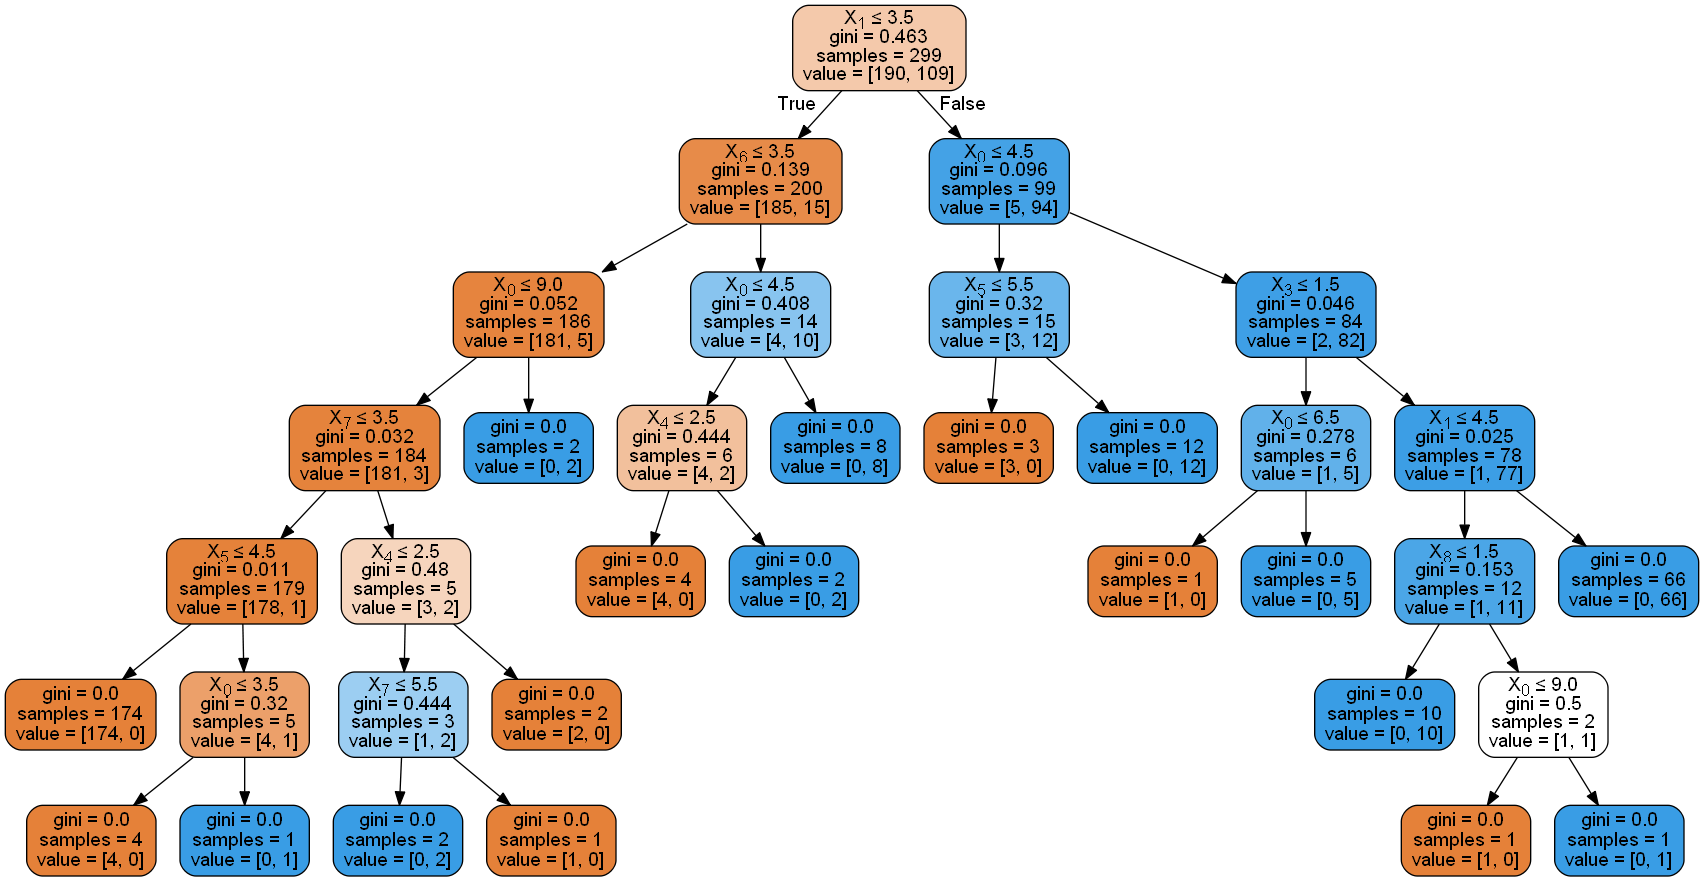

In [20]:
dot_data = StringIO()
export_graphviz(algorithm, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
clf = RandomForestClassifier(bootstrap=True,n_estimators=100, max_depth=2,
                              random_state=0)

In [23]:
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [24]:
y_pred1=clf.predict(x_test)

In [25]:
probs1 = clf.predict_proba(x_test)

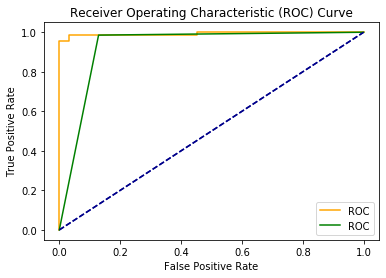

In [26]:
fpr1, tpr1, thresholds1 = roc_curve(y_test, probs1[:,0],pos_label='begnin')
plt.plot(fpr1, tpr1, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
fpr, tpr, thresholds = roc_curve(y_test, probs[:,0],pos_label='begnin')
plt.plot(fpr, tpr, color='green', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
classifier = KNeighborsClassifier(algorithm='ball_tree',n_neighbors=5,weights='distance')
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [29]:
y_pred2 = classifier.predict(x_test)
accuracy_score(y_test,y_pred2)

0.98

In [30]:
probs2=classifier.predict_proba(x_test)

In [37]:
from sklearn.linear_model import LogisticRegression

In [70]:
logreg = LogisticRegression(class_weight='balanced')
logreg.fit(x_train, y_train)

C:\Users\aymen\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [71]:
y_pred3 = logreg.predict(x_test)

In [72]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred3)
print(confusion_matrix)

[[68  1]
 [ 0 31]]


In [73]:
accuracy_score(y_test,y_pred3)

0.99

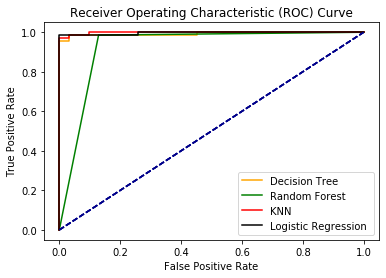

In [58]:
fpr1, tpr1, thresholds1 = roc_curve(y_test, probs1[:,0],pos_label='begnin')
plt.plot(fpr1, tpr1, color='orange', label='Decision Tree')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
fpr, tpr, thresholds = roc_curve(y_test, probs[:,0],pos_label='begnin')
plt.plot(fpr, tpr, color='green', label='Random Forest')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
fpr2, tpr2, thresholds2 = roc_curve(y_test, probs2[:,0],pos_label='begnin')
plt.plot(fpr2, tpr2, color='red', label='KNN')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
fpr3, tpr3, thresholds3 = roc_curve(y_test, logreg.predict_proba(x_test)[:,0],pos_label='begnin')
plt.plot(fpr3, tpr3,color='black', label='Logistic Regression ')
plt.plot([0, 1], [0, 1],color='darkblue',linestyle='--')
plt.legend()
plt.show()